# Assesment 2 - QLD Train Lines

# Cleaned data
In the clean CSV file the irregularities that were cleared were lines with text (lines[115-128]), as they were error messages produced while importing the file from the QLD Transport's website and hold no relevance to the train lines and values in the table. Deleting the respective lines does not harm the original data or delete any values from the CSV file

In [3]:
import pandas

qld_train = pandas.read_csv('real_data .csv')


# Converting Unix timestamp to AEST 
<b>Arrival Time stamp & Departure time stamp

In [4]:
# converts the arrival_timestamp column to UTC and then adds a new column named Arrival_timesptamp_AEST
qld_train['Arrival_timestamp_AEST']=pandas.to_datetime(qld_train['arrival_timestamp'],unit='s')
qld_train['Arrival_timestamp_AEST']=qld_train['Arrival_timestamp_AEST'].dt.tz_localize('UTC').dt.tz_convert('Australia/Brisbane')

# converts the departure_timestamp column to UTC and then adds a new column named Departure_timesptamp_AEST
qld_train['Departure_timestamp_AEST']=pandas.to_datetime(qld_train['departure_timestamp'],unit='s')
qld_train['Departure_timestamp_AEST']=qld_train['Departure_timestamp_AEST'].dt.tz_localize('UTC').dt.tz_convert('Australia/Brisbane')
qld_train

,line,trip_id,stop_name,arrival_timestamp,arrival_delay,departure_timestamp,departure_delay,Arrival_timestamp_AEST,Departure_timestamp_AEST
0,Airport,23662740-QR 22_23-32817-DS34,Bowen Hills,1.678659e+09,0.0,1.678659e+09,0.0,2023-03-13 08:08:00+10:00,2023-03-13 08:08:00+10:00
1,Airport,23662740-QR 22_23-32817-DS34,Bowen Hills,1.678745e+09,55.0,1.678745e+09,124.0,2023-03-14 08:08:55+10:00,2023-03-14 08:10:04+10:00
2,Airport,23662740-QR 22_23-32817-DS34,Bowen Hills,1.678832e+09,67.0,1.678832e+09,152.0,2023-03-15 08:09:07+10:00,2023-03-15 08:10:32+10:00
3,Airport,23662740-QR 22_23-32817-DS34,Bowen Hills,1.678918e+09,0.0,1.678918e+09,87.0,2023-03-16 08:08:00+10:00,2023-03-16 08:09:27+10:00
4,Airport,23662742-QR 22_23-32817-DS40,Bowen Hills,1.678661e+09,0.0,1.678661e+09,0.0,2023-03-13 08:38:00+10:00,2023-03-13 08:38:00+10:00
...,...,...,...,...,...,...,...,...,...
136710,Doomben,23662961-QR 22_23-32817-TB11,Doomben,1.678746e+09,348.0,1.678746e+09,348.0,2023-03-14 08:21:48+10:00,2023-03-14 08:21:48+10:00
136711,Doomben,23662961-QR 22_23-32817-TB11,Doomben,1.678832e+09,323.0,1.678832e+09,323.0,2023-03-15 08:21:23+10:00,2023-03-15 08:21:23+10:00
136712,Doomben,23662961-QR 22_23-32817-TB11,Doomben,1.678919e+09,124.0,1.678919e+09,124.0,2023-03-16 08:18:04+10:00,2023-03-16 08:18:04+10:00
136713,Doomben,23663413-QR 22_23-32818-DB09,Doomben,1.679003e+09,211.0,1.679003e+09,211.0,2023-03-17 07:49:31+10:00,2023-03-17 07:49:31+10:00


# On-Time arrival for the week 
The following part calculates the total number of trains for the week(12/3/2023 - 19/3/2023) that have arrived within the arrival delay allowed by the Queensland rail, which is arrival within 4 minutes (240 seconds) of the arrival time. whereas interurban lines such as Gold Coast, Rosewood and gympie lines are allowed arrival within 6 minutes (360 seconds).

In [5]:
def is_on_time(row):
    train_line = row['line']
    arrival_delay = row['arrival_delay']
    if train_line in ['Gold Coast', 'Rosewood', 'Gympie']:
        return arrival_delay < 360  
    else:
        return arrival_delay < 240 
# Applies the function to the imported data
qld_train['On_Time'] = qld_train.apply(is_on_time, axis=1) 

# calculates the percentage of on time arrival 
on_time_percentage = round((qld_train.On_Time.sum() / len(qld_train)) * 100)

print(f"Out of {len(qld_train)} trains, {qld_train.On_Time.sum()} trains were on time, which is {on_time_percentage}% of the total.")


Out of 136715 trains, 124097 trains were on time, which is 91% of the total.


# On-Time running for each train line 
Calculates the number of trains that run on time for each train line 

In [6]:
on_time_each_train = qld_train.groupby(qld_train.line).On_Time.agg(sum)

print(on_time_each_train)

line
Airport         4251
Beenleigh      17830
Caboolture      4535
Cleveland      17163
Doomben         3094
Ferny Grove    11234
Gold Coast      8321
Gympie           471
Ipswich        12993
Nambour         4132
Redcliffe      13854
Rosewood        1335
Shorncliffe    15544
Springfield     9340
Name: On_Time, dtype: int64


<AxesSubplot:title={'center':'Number of trains on time '}, xlabel='Train Line', ylabel='Number of trips on time'>

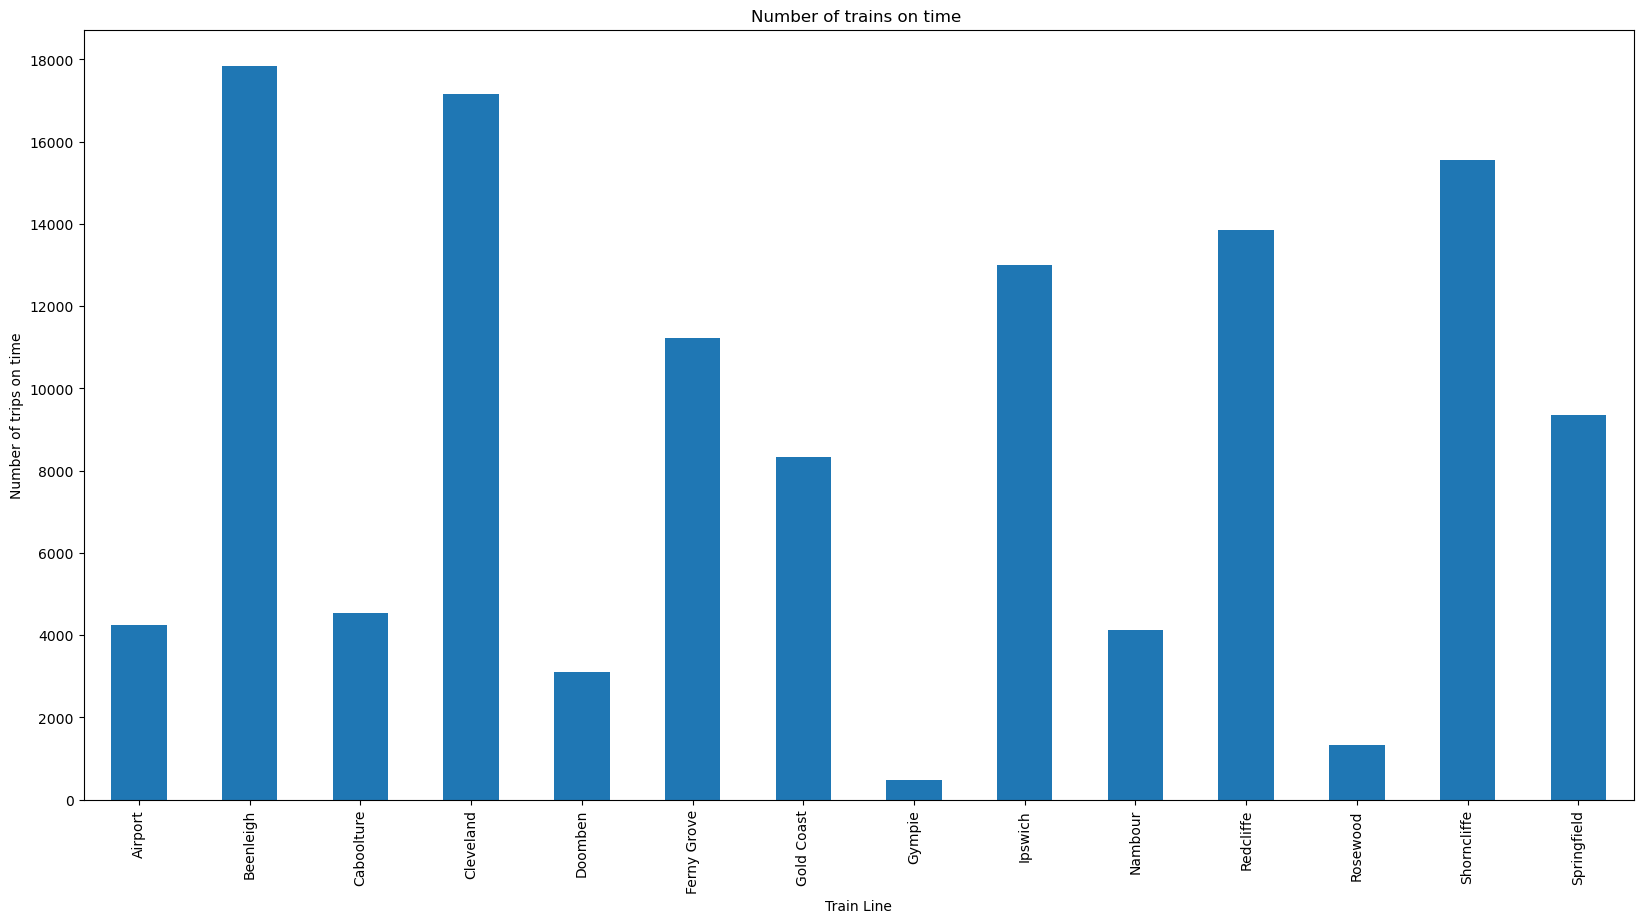

In [7]:
on_time_each_train.plot.bar(figsize = (20,10), xlabel = 'Train Line', ylabel = 'Number of trips on time', title = 'Number of trains on time ', yticks=range(0,20000,2000))

The following graph shows the number of on-time train arrivals for each train line.<br/>
As seen Beenliegh and Cleveland are have the highest on time arrival with 17830, and 17163 trains. <br/>
Whereas Rosewood and Gympie both the interurban lines have the lowest on time arrival with only 1335 and 471 trains. <br/>
Lastly the only other interurban line the Gold coast service has 8321 train arriving on time  

# On-Time running for each date from 13/3/23   -  19/3/23 
Calculates the total number of trains that arrive on time for each day of the week 

In [8]:
# converts in days format 
Days = qld_train['Arrival_timestamp_AEST'].dt.date
daily_on_time_count = qld_train.groupby(Days)['On_Time'].sum()

print(daily_on_time_count)

Arrival_timestamp_AEST
2023-03-13    15990
2023-03-14    19781
2023-03-15    19885
2023-03-16    20263
2023-03-17    20127
2023-03-18    14785
2023-03-19    13266
Name: On_Time, dtype: int64


<AxesSubplot:title={'center':'Number of trains on time '}, xlabel='Dates', ylabel='On-Time trips for each day'>

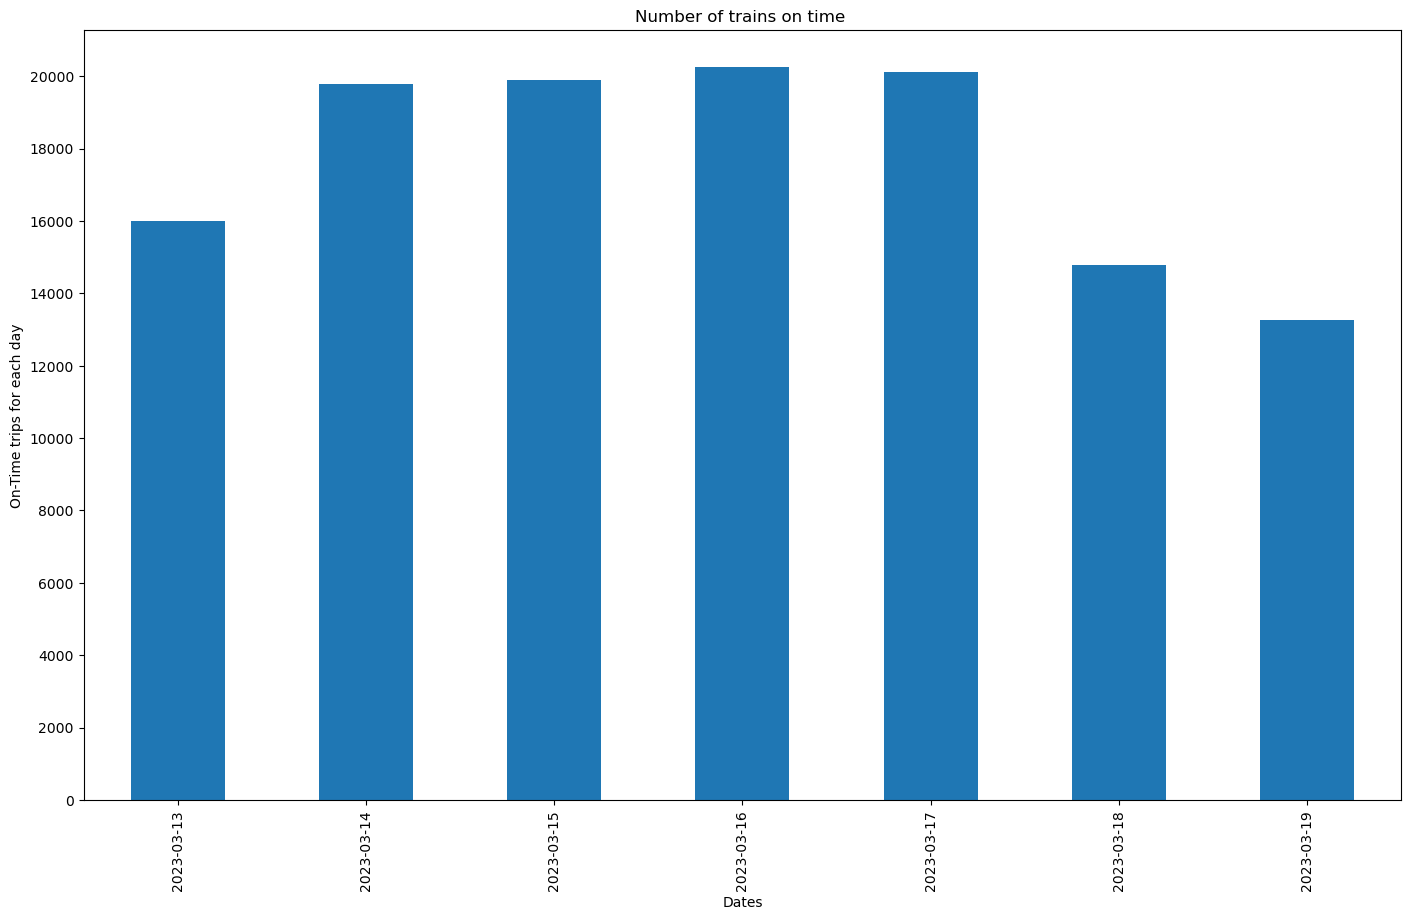

In [9]:
daily_on_time_count.plot.bar(figsize = (17,10), xlabel = 'Dates', ylabel = 'On-Time trips for each day', title = 'Number of trains on time ', yticks=range(0,22000,2000))

The bargraph presented above shows the on-time arrival of trains for each day of the week from 12/3/2023 - 19/3/2023 <br/>

As seen above weekdays have a higher on time arrival rate when compared to the weekends. with days such as the 16/3/2023(thursday) having an on time arrival of 20263, 17/3/2023(Friday) having a 20127 on-time arrival, and 15/3/2023(Wednesday) having a 19885 arrival. <br/>

Whereas the 19/3/2023(Sunday) having the lowest on time arrival with 13266, followed by 18/3/2023(Saturday) with an on-time arrival of 14785

# On-time arrival for each hour of the week 

In [10]:
hourly_on_time_count = qld_train.groupby([Days, qld_train['Arrival_timestamp_AEST'].dt.hour])['On_Time'].sum()

print(hourly_on_time_count)

Arrival_timestamp_AEST  Arrival_timestamp_AEST
2023-03-13              0.0                        23
                        3.0                         6
                        4.0                       154
                        5.0                       456
                        6.0                       746
                                                 ... 
2023-03-19              19.0                      623
                        20.0                      661
                        21.0                      689
                        22.0                      475
                        23.0                      199
Name: On_Time, Length: 162, dtype: int64


<AxesSubplot:title={'center':'ON-Time arrival for each hour of the week '}, xlabel='Dates', ylabel='On-Time trips'>

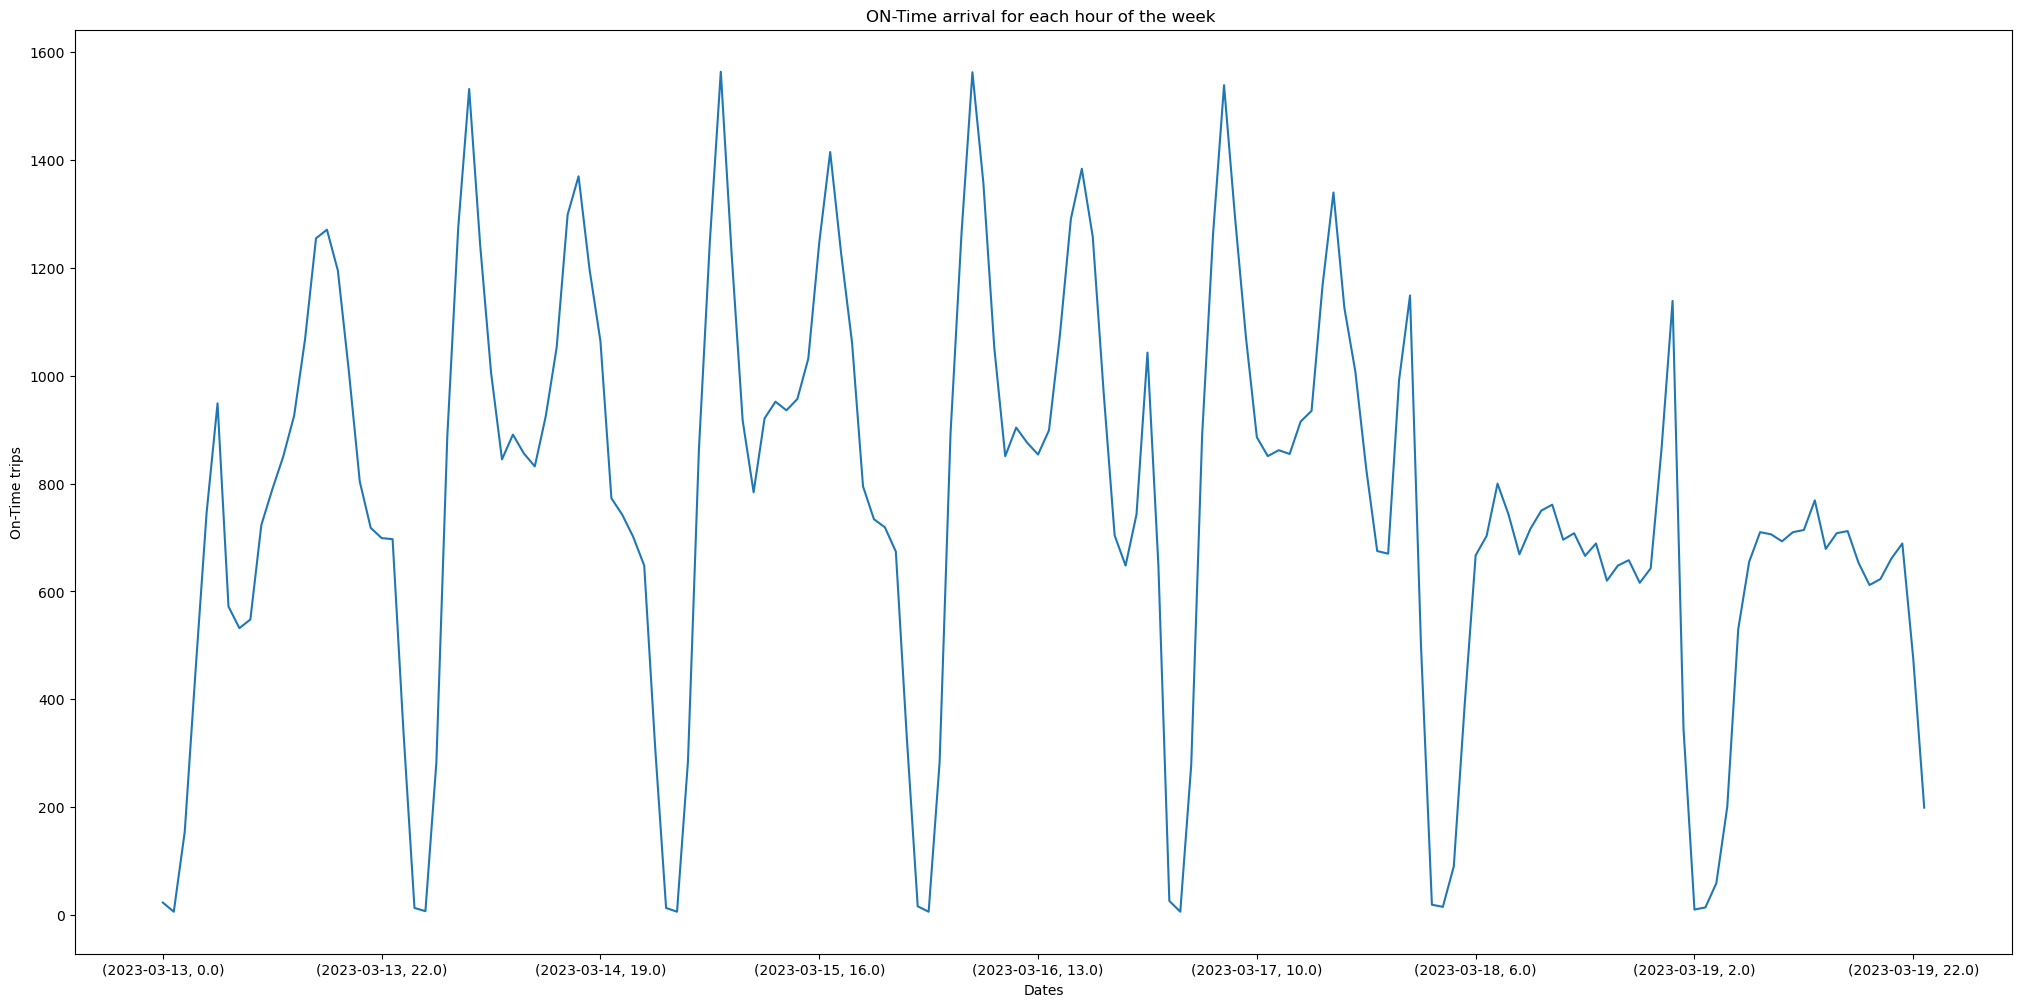

In [11]:
hourly_on_time_count.plot.line(figsize=(25,12), yticks = range(0,1700,200),xlabel = 'Dates', ylabel = 'On-Time trips', title = 'ON-Time arrival for each hour of the week ')

The Line graph above shows the hourly on time arrival for the week 13/3/2023 - 19/3/2023<br/>

as seen in the line graph a we can see that the on a high time arrival durring the weekdays and a strady drop as we apprach the weekend.<br/>
regarding each day we can see that the on time arrival stays the highest during morning hours, due to people using the public transports to get to thier working places. grdually a drop can be seen during the afternoon hours, however again a rise is seen during the evening hours when majoority of the publics working hours end and they use public transports to get to thier respective places. this trend is maintained constantlyy throoughout the weekdays. <br/>
however as we approach the weekend a drop can be seen as less people tend to use the public transports

# On-Time arrival for each stop on the Ferny Grove line 

In [12]:
Ferny_grove_stops = qld_train[qld_train['line'] == 'Ferny Grove'].groupby('stop_name')['On_Time'].sum()

print(Ferny_grove_stops)

stop_name
Alderley            847
Bowen Hills         880
Central             467
Enoggera            847
Ferny Grove         570
Fortitude Valley    800
Gaythorne           849
Grovely             811
Keperra             812
Mitchelton          817
Newmarket           842
Oxford Park         816
Park Road            33
Roma Street          84
South Bank           33
South Brisbane       32
Wilston             851
Windsor             843
Name: On_Time, dtype: int64


#  Weekday Peak Hours

In [13]:
weekdays = qld_train[qld_train['Arrival_timestamp_AEST'].dt.dayofweek < 5]

hourly_trips = weekdays.groupby(weekdays['Arrival_timestamp_AEST'].dt.hour)['trip_id'].nunique()

print(hourly_trips)
print(f"Morning peak hours - 6AM - 9AM ")
print(f"Evening peak hours - 16PM - 18PM ")

Arrival_timestamp_AEST
0      36
1       5
3       4
4      65
5     152
6     229
7     278
8     263
9     200
10    166
11    151
12    159
13    160
14    162
15    187
16    244
17    266
18    232
19    189
20    138
21    119
22    124
23    113
Name: trip_id, dtype: int64
Morning peak hours - 6AM - 9AM 
Evening peak hours - 16PM - 18PM 


<AxesSubplot:title={'center':'Peak Traffic Hours'}, xlabel='Hours of a day', ylabel='On-Time arrival'>

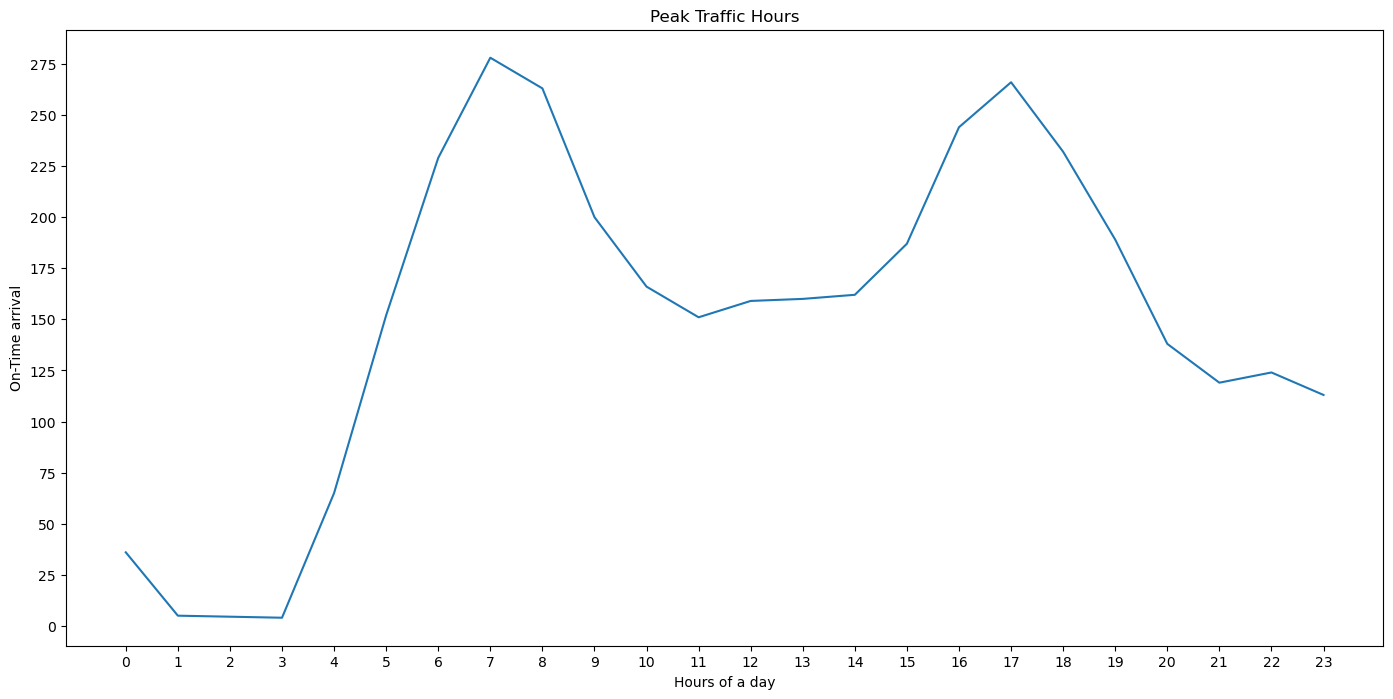

In [14]:
hourly_trips.plot.line(figsize = (17,8), xticks=range(0,24), yticks = range(0,300,25), title = 'Peak Traffic Hours', ylabel = 'On-Time arrival', xlabel = 'Hours of a day')

The following graph shows the peak traffic hours of the weekday<br/>
as seen in the line graph above a rise can be seen in the number of trips early moring hours, leading to a peak morning traffic hour from 6am-9am. 
After 8am a graduall drop can be seen in the number of trips and plateau of from 11pm - 15 pm.<br/>
however as the a rise can be seen again in the number trips leading to a peak evening traffic hour from 16pm - 18pm

# On-Time arrival during Weekday Peak Hours

In [15]:
morning_peak = weekdays[(weekdays['Arrival_timestamp_AEST'].dt.hour >= 6) & (weekdays['Arrival_timestamp_AEST'].dt.hour <= 9)]

afternoon_peak = weekdays[(weekdays['Arrival_timestamp_AEST'].dt.hour >= 16) & (weekdays['Arrival_timestamp_AEST'].dt.hour <= 18)]

# on-time count during morning peak hours
morning_on_time = morning_peak['On_Time'].sum()
print('Morning peak on-time count:', morning_on_time)

# on-time count during afternoon peak hours
afternoon_on_time = afternoon_peak['On_Time'].sum()
print('Afternoon peak on-time count:', afternoon_on_time)

Morning peak on-time count: 23215
Afternoon peak on-time count: 19043


# Departure delay for each train line 

<AxesSubplot:title={'center':'Departure delay of train line'}, xlabel='line', ylabel='Number of trains'>

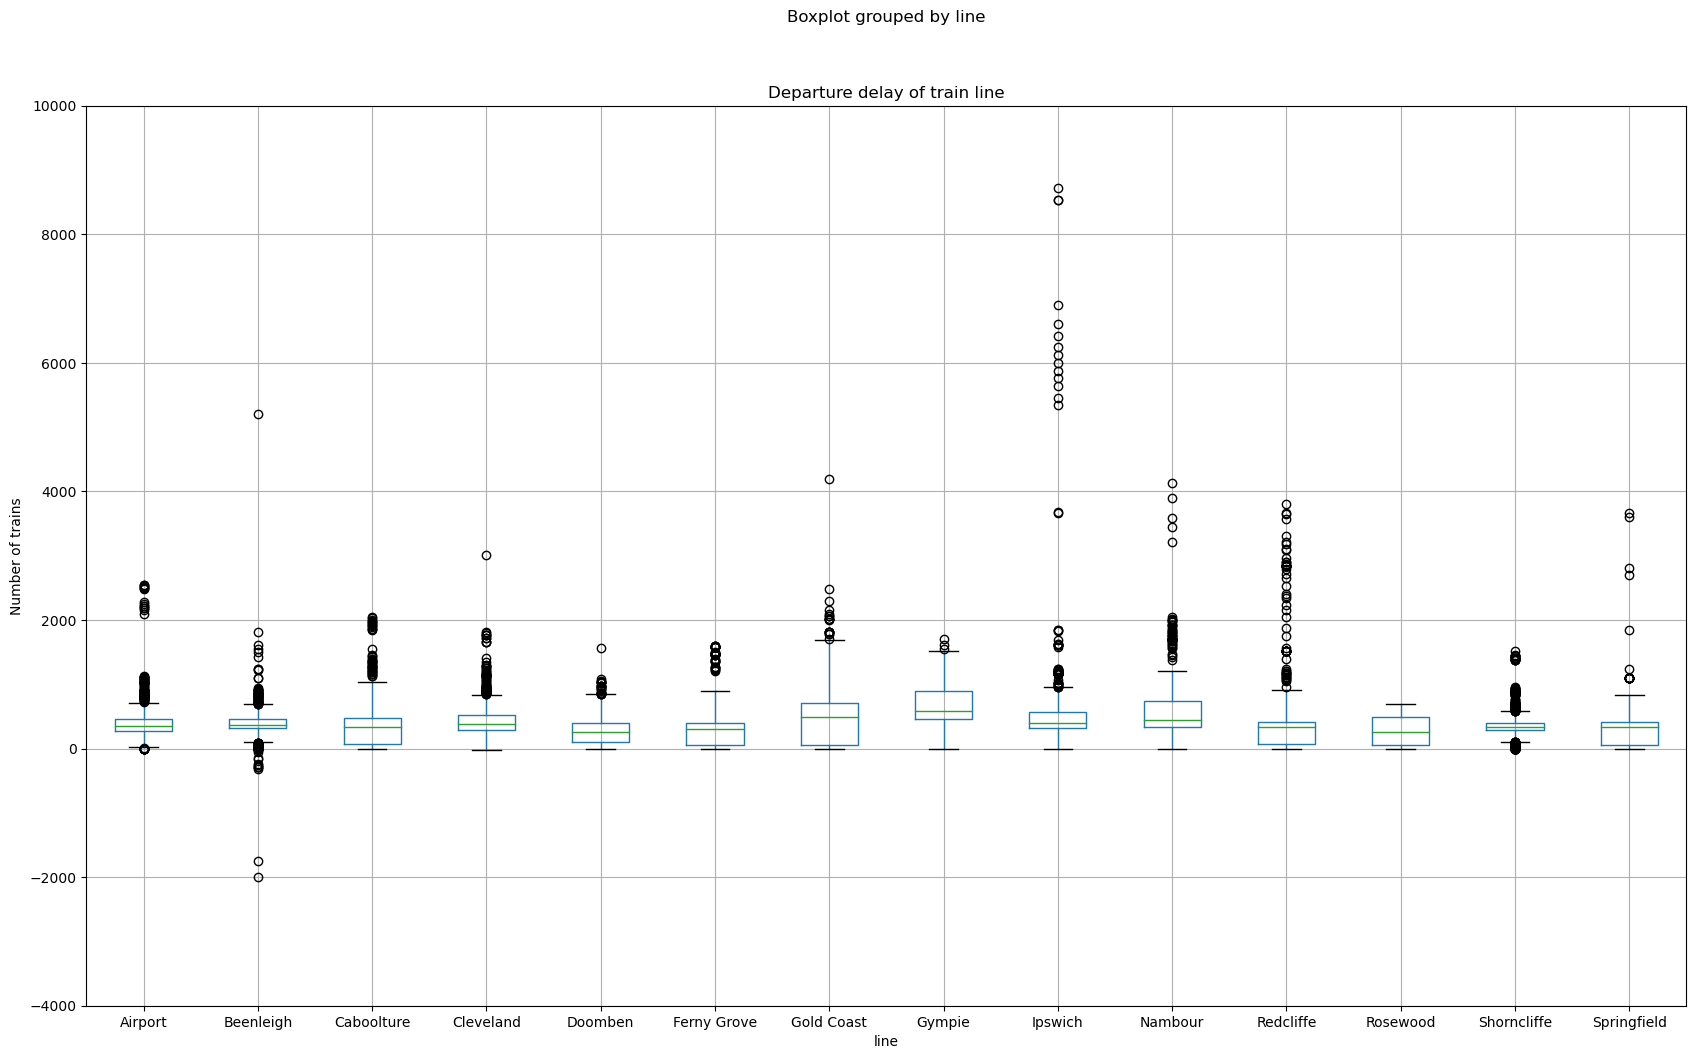

In [16]:
Delayed_train = qld_train[qld_train['On_Time'] == False].boxplot(column='departure_delay', by='line', figsize=(20, 12))
Delayed_train.set_ylim(-4000, 10000) 
Delayed_train.set_title('Departure delay of train line')
Delayed_train.set_ylabel('Number of trains')
Delayed_train

The presented Box plot provides the number of delayed trains for each of the train line.<br/>
As seen in the figure the ipswich line has the highest outlier, approximately touching 9000, followed by Beenleigh in the ramge of 4000-6000.<br/>
almost all of the trains lower quartile, median, & upper quartile falls in the similar range between 0 - 2000<br/>
As presented Ipswich has the highest number of train delays for week. <br/>
The Airport line has the lowest number of train delays for the week.

# Number of train stations on each train line 

In [17]:
station_count = qld_train.groupby('line')['stop_name'].nunique()

print(station_count)

line
Airport        12
Beenleigh      28
Caboolture     25
Cleveland      25
Doomben        14
Ferny Grove    18
Gold Coast     16
Gympie         23
Ipswich        26
Nambour        22
Redcliffe      22
Rosewood       32
Shorncliffe    21
Springfield    18
Name: stop_name, dtype: int64


<AxesSubplot:title={'center':'Percent of train stations on each train line'}>

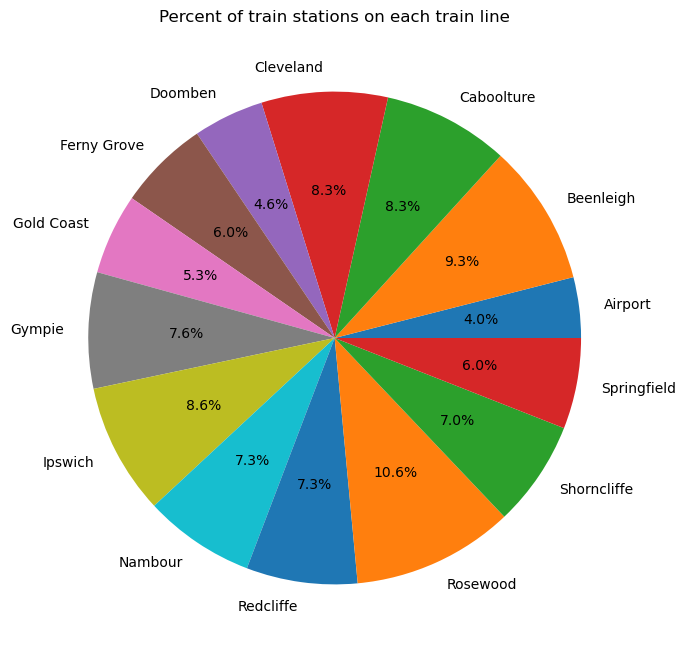

In [18]:
station_count.plot.pie(figsize =(12,8), title ='Percent of train stations on each train line', ylabel ='', autopct='%1.1f%%' )

The above pie chart depicts the number of train stations each train line consists of. <br/>
As seen a majority of the train lines consists of the same of stations ranging from 7% to 8%.<br/> 
Rosewood consists of the highest number of train stations, with 10.6% of the pie chart, it comprises of 32 train stations. Followed by Beenleigh with 28 stops which adds upto 9.3%. <br/>
Whereas on the other hand, the Airport train line has the lowest number of stops, with only 12 stops, which makes only 4%. Followed by Doomben with 4.6%, which comprises of 14 stops 

# Doomben station scheduled VS actual departure

In [19]:
doomben_station = qld_train[(qld_train['stop_name'] == 'Doomben') & (qld_train['Arrival_timestamp_AEST'].dt.weekday == 1) & (qld_train['Departure_timestamp_AEST'].dt.hour == 9)]

# The first trip at Doomben station at Tuesday 9am
row = doomben_station.iloc[0]
row 

line                                             Doomben
trip_id                     23662570-QR 22_23-32817-DB17
stop_name                                        Doomben
arrival_timestamp                           1678751296.0
arrival_delay                                      136.0
departure_timestamp                         1678751296.0
departure_delay                                    136.0
Arrival_timestamp_AEST         2023-03-14 09:48:16+10:00
Departure_timestamp_AEST       2023-03-14 09:48:16+10:00
On_Time                                             True
Name: 25105, dtype: object

In [20]:
# Scheduled departure time and delay in seconds
scheduled_departure_time = row['Departure_timestamp_AEST']
departure_delay = row['departure_delay']

# Actual departure time 
actual_departure_time = scheduled_departure_time + pandas.Timedelta(seconds=departure_delay)

print("Scheduled Departure Time:", scheduled_departure_time)
print("Actual Departure Time:", actual_departure_time)

Scheduled Departure Time: 2023-03-14 09:48:16+10:00
Actual Departure Time: 2023-03-14 09:50:32+10:00


# Doomben Station 

In [21]:
Doomben = qld_train[qld_train['stop_name'] == 'Doomben']

In [22]:
Doomben

,line,trip_id,stop_name,arrival_timestamp,arrival_delay,departure_timestamp,departure_delay,Arrival_timestamp_AEST,Departure_timestamp_AEST,On_Time
25074,Doomben,23662278-QR 22_23-32817-1B03,Doomben,1.678739e+09,3.0,1.678739e+09,3.0,2023-03-14 06:16:03+10:00,2023-03-14 06:16:03+10:00,True
25075,Doomben,23662278-QR 22_23-32817-1B03,Doomben,1.678825e+09,25.0,1.678825e+09,25.0,2023-03-15 06:16:25+10:00,2023-03-15 06:16:25+10:00,True
25076,Doomben,23662278-QR 22_23-32817-1B03,Doomben,1.678911e+09,-11.0,1.678911e+09,-11.0,2023-03-16 06:15:49+10:00,2023-03-16 06:15:49+10:00,True
25077,Doomben,23662280-QR 22_23-32817-1B05,Doomben,1.678740e+09,2.0,1.678740e+09,2.0,2023-03-14 06:46:02+10:00,2023-03-14 06:46:02+10:00,True
25078,Doomben,23662280-QR 22_23-32817-1B05,Doomben,1.678827e+09,4.0,1.678827e+09,4.0,2023-03-15 06:46:04+10:00,2023-03-15 06:46:04+10:00,True
...,...,...,...,...,...,...,...,...,...,...
136710,Doomben,23662961-QR 22_23-32817-TB11,Doomben,1.678746e+09,348.0,1.678746e+09,348.0,2023-03-14 08:21:48+10:00,2023-03-14 08:21:48+10:00,False
136711,Doomben,23662961-QR 22_23-32817-TB11,Doomben,1.678832e+09,323.0,1.678832e+09,323.0,2023-03-15 08:21:23+10:00,2023-03-15 08:21:23+10:00,False
136712,Doomben,23662961-QR 22_23-32817-TB11,Doomben,1.678919e+09,124.0,1.678919e+09,124.0,2023-03-16 08:18:04+10:00,2023-03-16 08:18:04+10:00,True
136713,Doomben,23663413-QR 22_23-32818-DB09,Doomben,1.679003e+09,211.0,1.679003e+09,211.0,2023-03-17 07:49:31+10:00,2023-03-17 07:49:31+10:00,True


In [23]:
Doomben.describe()

,arrival_timestamp,arrival_delay,departure_timestamp,departure_delay
count,1.990000e+02,199.000000,3.030000e+02,303.000000
mean,1.678890e+09,110.321608,1.678878e+09,112.877888
std,1.364645e+05,175.999532,1.356065e+05,154.967423
min,1.678657e+09,-80.000000,1.678651e+09,-76.000000
25%,1.678767e+09,33.000000,1.678762e+09,48.000000
50%,1.678874e+09,70.000000,1.678866e+09,98.000000
75%,1.679010e+09,118.500000,1.679003e+09,120.000000
max,1.679134e+09,1523.000000,1.679134e+09,1561.000000


As presented in the table above we can see that the mean arrival delay is 110.32 seconds and the mean departure delay is 112.87 seconds. Furthermore 75% of the train arrive within 118.5 seconds.  This shows that a majority of the trains run on time.<br/> The station has a minimum arrival delay value of -80 seconds which shows that the train has arrived early, followed by a minimum departure delay value of -76 seconds whihc shows a early departure. <br/>
On the other hand its has a maximum arrival delay value of 1523 seconds & maximum departure delay of 1561 seconds 

<AxesSubplot:title={'center':'Arrival delay at Doomben station'}, ylabel='Frequency'>

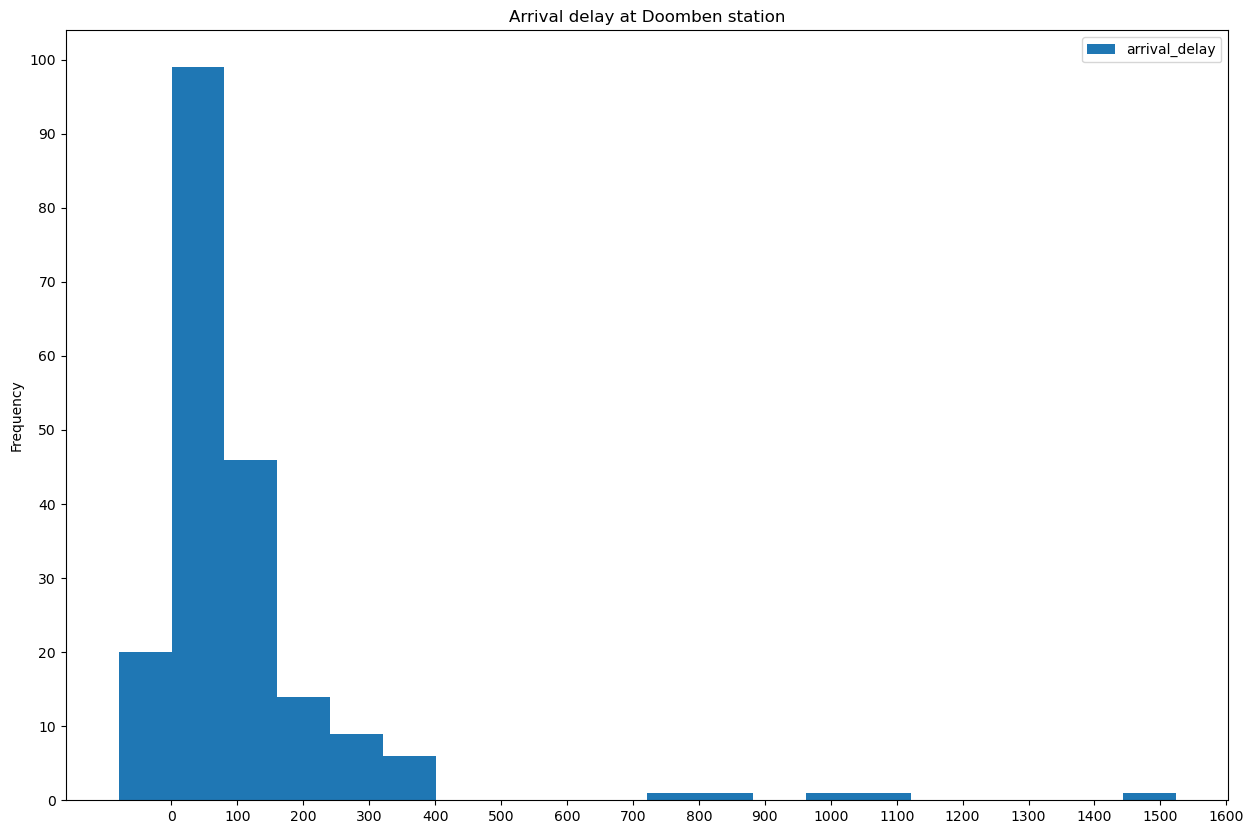

In [24]:
Doomben['arrival_delay'].plot.hist(legend = 'Doomben station', ylabel = 'Frequency', xlabel = 'Seconds', title = 'Arrival delay at Doomben station', bins = 20, yticks = range(0,110,10), xticks = range(0,1700,100), figsize = (15,10) )

The following Histogram shows the number of arrival delays at doomben station <br/>
As seen in the graph above a majority of the trains arrive within 0 - 200 seconds, followed by 200 - 300 seconds. Once again showing that its has a high on time arrival.<br/>
Less that 10 times the station has had an arrival delay crossing 500 seconds 

<AxesSubplot:title={'center':'Doomben station Arrival VS departure'}, xlabel='arrival_delay', ylabel='departure_delay'>

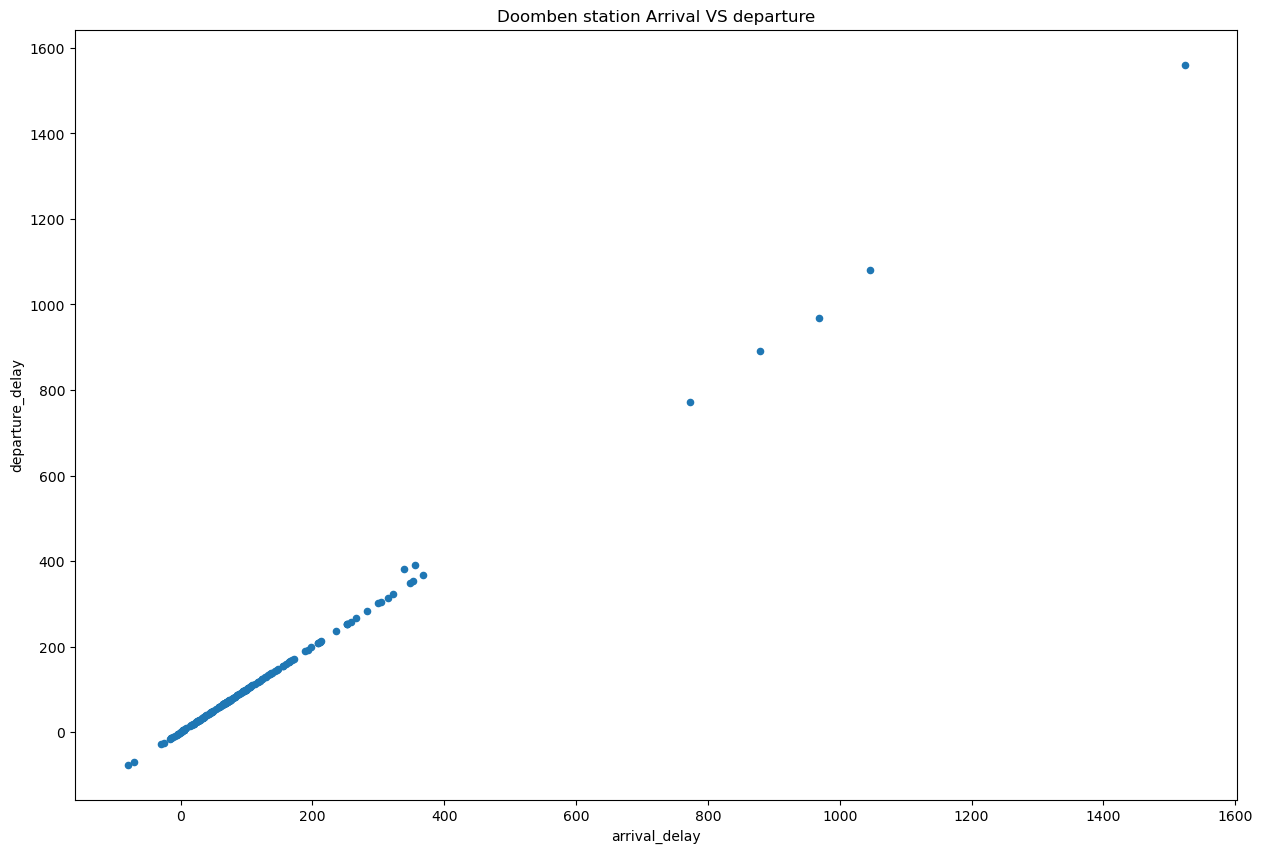

In [25]:
Doomben.plot.scatter(x= 'arrival_delay', y= 'departure_delay',xticks = range(0,1800,200) ,yticks = range(0,1800,200), title = 'Doomben station Arrival VS departure', figsize=(15,10))

The following scatter plot compares the arrival delay to the departure delay for the trains arriving at the Doomben station. <br/> It is clearly visibile that a trains arrival delay is approximately equal to its departure delay. this shows when a train arrives late or early at the doomben station it waits for the similar period of time and then exits from the station. 